In [87]:
import matplotlib.pyplot as plt
from brian2 import*

In [88]:
def visualise_connectivity(S, mylegend):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k', linewidth=S.w[i,j][0])
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')
    suptitle(mylegend)

In [92]:
start_scope()

#Recurrent weight from PC to PC
w_PC = 0.5
#Weight PC to INH
w_PCINH = 0.7
#Weight INH to PC
w_INHPC = 0.5
#Weight G to PC
w_GPC = 0.9
#Weigth S to PC
w_SPC = 0.8



N = 30
neuron_spacing = 50*umetre
width = N/4.0*neuron_spacing

# Neuron has one variable x, its position
PC = NeuronGroup(N, 'x : metre')
PC.x = 'i*neuron_spacing'

# All synapses are connected (excluding self-connections)
SPC = Synapses(PC, PC, 'w : 1')
SPC.connect(condition='i!=j')
# Weight varies with distance
SPC.w = 'w_PC*exp(-(x_pre-x_post)**2/(2*width**2))'


#Inhibitory cells
ninh = 3
p = 0.5
I = NeuronGroup(ninh, 'x : metre')
I.x = 'i*neuron_spacing'

#Connect INH to PC with probability 1/2
SIPC = Synapses(I, PC, 'w : 1')
SIPC.connect(p = p)
SIPC.w = 'w_PCINH'
#G inputs
nG = N
p = 0.6
G =  NeuronGroup(nG, 'x : metre')

#Connect G inputs to PC
SGPC = Synapses(G, PC, 'w : 1')
SGPC.connect(p = p)
SGPC.w = 'w_GPC'

#S inputs
nS = N
p = 0.6
S =  NeuronGroup(nS, eqs,  threshold='v>0.8', reset='v = 0', method='exact')

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

#Connect S inputs to PC
SGPC = Synapses(S, PC, 'w : 1')
SGPC.connect(p = p)
SGPC.w = 'w_SPC'

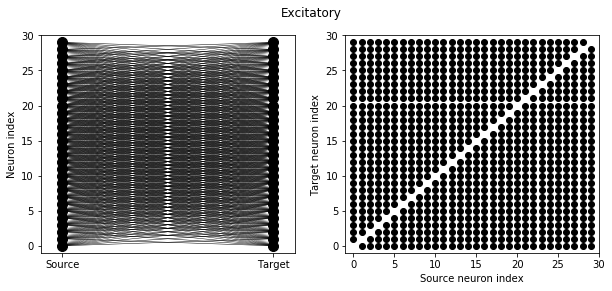

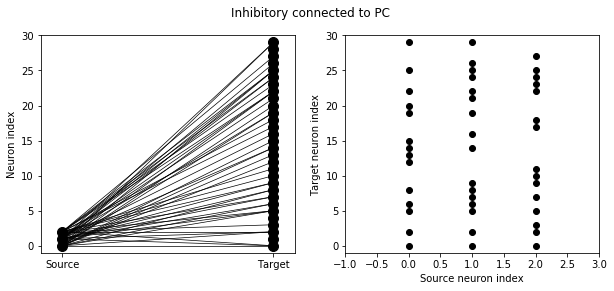

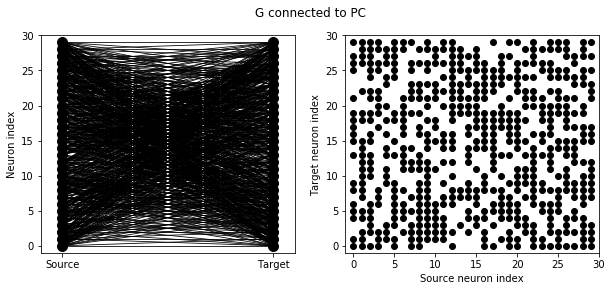

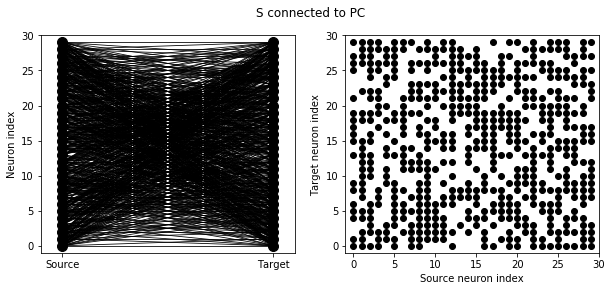

In [90]:
#Visualise


#Visualise recurrent connectivity
visualise_connectivity(SPC, "Excitatory")

#Visualise inhibitory connectivity
visualise_connectivity(SI, "Inhibitory connected to PC")

#Visualise G connectivity
visualise_connectivity(SGPC, "G connected to PC")


#Visualise S connectivity
visualise_connectivity(SGPC, "S connected to PC")